In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [ ]:
data1 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2020.csv')
data2 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2021.csv')
data3 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2022.csv')
data4 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2023.csv')
data5 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2024.csv')
data_all = (
    pd.concat([data1, data2, data3, data4, data5], ignore_index= True)
)


In [14]:
data_all['year'] = data_all['year'].astype(str)
data_all['year'].unique()

array(['2020', '2021', '2022', '2023', '2024'], dtype=object)

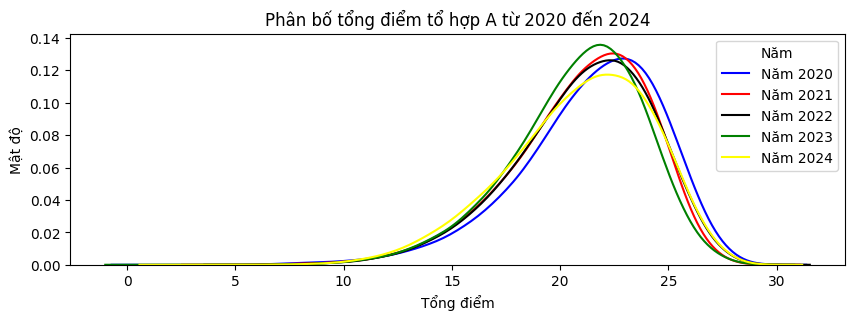

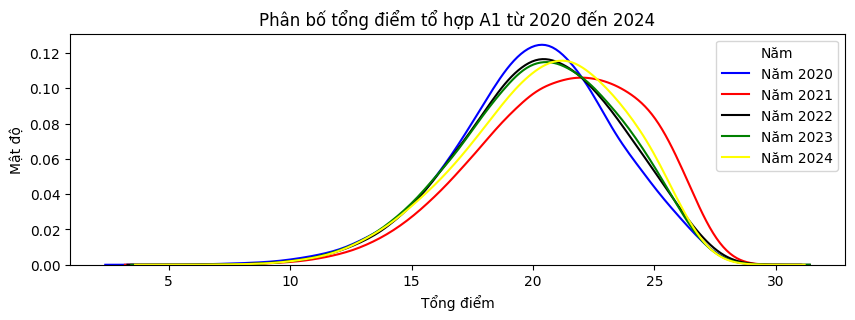

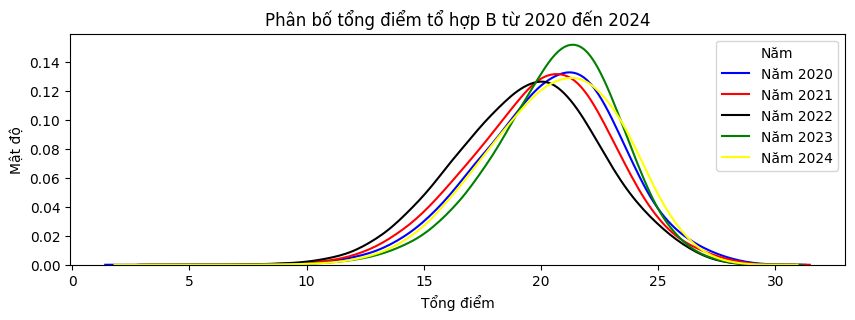

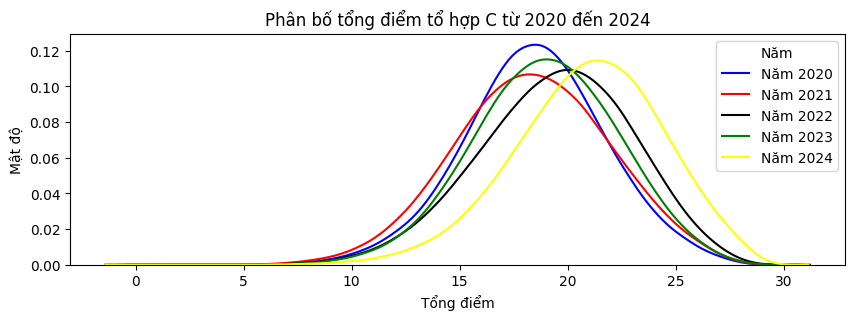

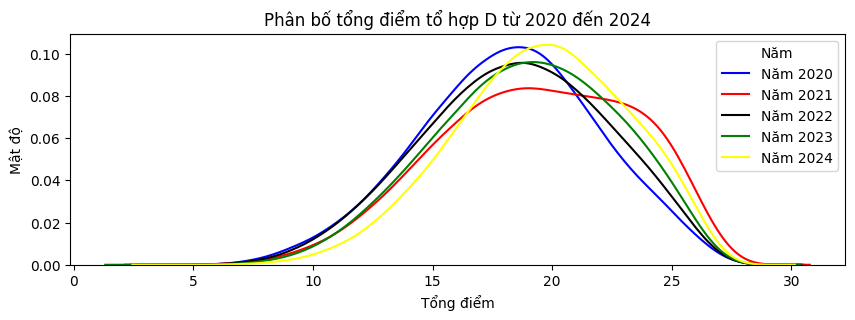

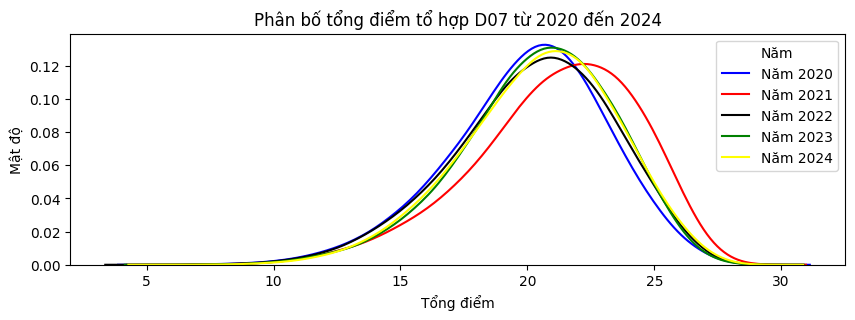

In [15]:
#tao cot tong diem cho tung to hop mon
data_all['A'] = data_all['toan'] + data_all['vat_ly'] + data_all['hoa_hoc']
data_all['A1'] = data_all['toan'] + data_all['vat_ly'] + data_all['ngoai_ngu']
data_all['B'] = data_all['toan'] + data_all['hoa_hoc'] + data_all['sinh_hoc']
data_all['C'] = data_all['ngu_van'] + data_all['lich_su'] + data_all['dia_ly']
data_all['D'] = data_all['toan'] + data_all['ngoai_ngu'] + data_all['ngu_van']
data_all['D07'] = data_all['toan'] + data_all['ngoai_ngu'] + data_all['hoa_hoc']
#cac to hop mon can phan tich
combinations = ['A','A1','B','C','D','D07']
#thiet lap cai dat cho bieu do
colors = ['blue','red','black','green','yellow']
#ve
for combo in combinations:
    plt.figure(figsize=(10, 3))
    for year, color in zip([2020, 2021, 2022, 2023, 2024], colors):
        data = data_all[data_all['year'] == str(year)][combo].dropna()
        sns.kdeplot(data, label=f'Năm {year}', color=color, bw_adjust=2)
    plt.title(f'Phân bố tổng điểm tổ hợp {combo} từ 2020 đến 2024')
    plt.xlabel('Tổng điểm')
    plt.ylabel('Mật độ')
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

Khối A

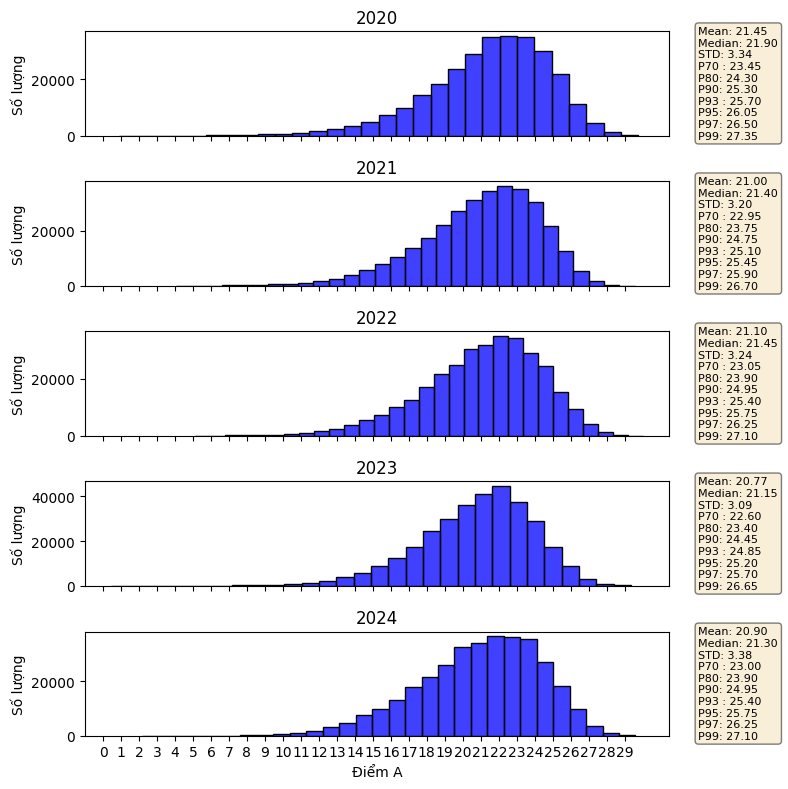

In [16]:
data = data_all
sub = 'A'
#chuyen doi cot year sang dang so
data['year'] = pd.to_numeric(data['year'])
#loc du lieu cho 5 nam gan day
recent_years = data[data['year'].isin([2020,2021,2022,2023,2024])]
socre = list(range(0, 30, 1))
#tao histogram cho diem toan trong 5 nam gan day sap xep theo dang 1 cot 5 hang
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)
#cac nam gan day sap xep theo thu tu tang dan
recent_years_sorted = sorted(recent_years['year'].unique())
#ve histogram cho tung nam va hien thi cac thong tin thong ke
for i, year in enumerate(recent_years_sorted):
  sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black',color='blue')
  axes[i].set_title(f'{year}')
  axes[i].set_xlabel(f'Điểm {sub}')
  axes[i].set_ylabel('Số lượng')
  #tinh toan cac thong ke
  year_data = recent_years[recent_years['year']==year][sub].dropna()
  mean = year_data.mean()
  median = year_data.median()
  std_dev = year_data.std()
  p70 = year_data.quantile(0.70)
  p80 = year_data.quantile(0.80)
  p90 = year_data.quantile(0.90)
  p93 = year_data.quantile(0.93)
  p95 = year_data.quantile(0.95)
  p97 = year_data.quantile(0.97)
  p99 = year_data.quantile(0.99)
  #hien thi thong tin thong ke tren bieu do
  textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70 : {p70:.2f}\nP80: {p80:.2f}\nP90: {p90:.2f}\n'
                f'P93 : {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8,
                  verticalalignment='center', horizontalalignment='left', bbox=props)
plt.xticks(socre)
plt.tight_layout()
plt.show()

<ipython-input-17-2e7a3005a212>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['bins'] = pd.cut(data_2023[combo], bins)
<ipython-input-17-2e7a3005a212>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['bins'] = pd.cut(data_2024[combo], bins)


Sự chênh lệch trung bình số học sinh: 768.4736842105267
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-4847.761081278546, 6384.708449699599)


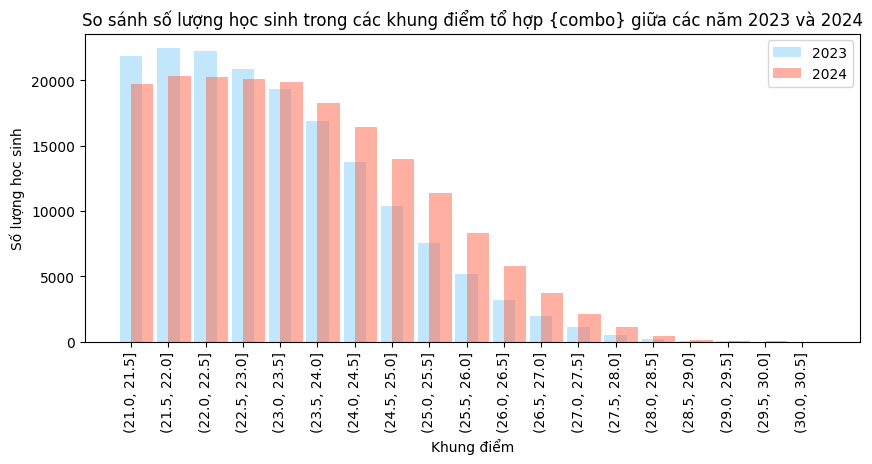

In [17]:
#uoc luong
from scipy import stats
#lua chon to hop mon can phan tich
combo = 'A'
#chia khung diem tu 20 den 30, moi khoang 1 diem
bins = np.arange(21, 31, 0.5)
#loc du lieu cho nam 2023 va 2024
data_2023 = data_all[data_all['year'] == 2023]
data_2024 = data_all[data_all['year'] == 2024]
#tao bang dem so luong hoc sinh trong moi khung diem cho tung nam
data_2023['bins'] = pd.cut(data_2023[combo], bins)
data_2024['bins'] = pd.cut(data_2024[combo], bins)
count_2023 = data_2023['bins'].value_counts().sort_index()
count_2024 = data_2024['bins'].value_counts().sort_index()
#tinh toan su chenh lech trung binh so hoc sinh va khoang tin cay
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))
#hien thi ket qua
print("Sự chênh lệch trung bình số học sinh:", mean_diff)
print("Khoảng tin cậy 95% cho sự chênh lệch trung bình:", confidence_interval)
#ve bieu do so sanh so luong hoc sinh trong moi khung diem cho 2 nam
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align = 'center', alpha = 0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align = 'edge', alpha = 0.5, color='tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng học sinh')
plt.title('So sánh số lượng học sinh trong các khung điểm tổ hợp {combo} giữa các năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()



Khối A1

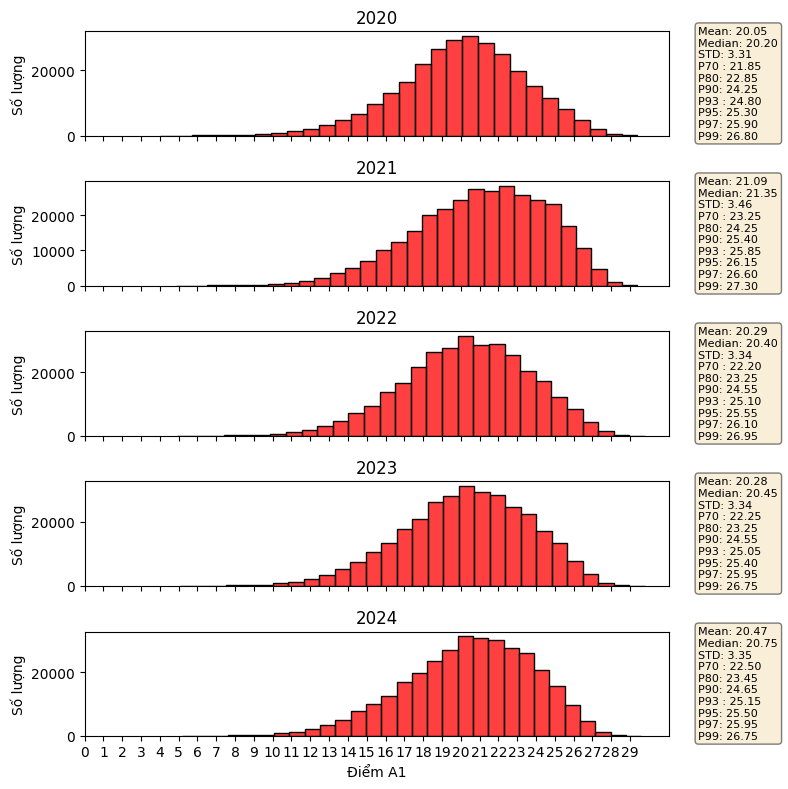

In [18]:
data = data_all
sub = 'A1'
#chuyen doi cot year sang dang so
data['year'] = pd.to_numeric(data['year'])
#loc du lieu cho 5 nam gan day
recent_years = data[data['year'].isin([2020,2021,2022,2023,2024])]
socre = list(range(0, 30, 1))
#tao histogram cho diem toan trong 5 nam gan day sap xep theo dang 1 cot 5 hang
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)
#cac nam gan day sap xep theo thu tu tang dan
recent_years_sorted = sorted(recent_years['year'].unique())
#ve histogram cho tung nam va hien thi cac thong tin thong ke
for i, year in enumerate(recent_years_sorted):
  sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black',color='red')
  axes[i].set_title(f'{year}')
  axes[i].set_xlabel(f'Điểm {sub}')
  axes[i].set_ylabel('Số lượng')
  #tinh toan cac thong ke
  year_data = recent_years[recent_years['year']==year][sub].dropna()
  mean = year_data.mean()
  median = year_data.median()
  std_dev = year_data.std()
  p70 = year_data.quantile(0.70)
  p80 = year_data.quantile(0.80)
  p90 = year_data.quantile(0.90)
  p93 = year_data.quantile(0.93)
  p95 = year_data.quantile(0.95)
  p97 = year_data.quantile(0.97)
  p99 = year_data.quantile(0.99)
  #hien thi thong tin thong ke tren bieu do
  textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70 : {p70:.2f}\nP80: {p80:.2f}\nP90: {p90:.2f}\n'
                f'P93 : {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8,
                  verticalalignment='center', horizontalalignment='left', bbox=props)
plt.xticks(socre)
plt.tight_layout()
plt.show()


<ipython-input-19-5e7687c623c5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['bins'] = pd.cut(data_2023[combo], bins)
<ipython-input-19-5e7687c623c5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['bins'] = pd.cut(data_2024[combo], bins)


Sự chênh lệch trung bình số học sinh: 911.3684210526317
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-3678.928455074398, 5501.665297179661)


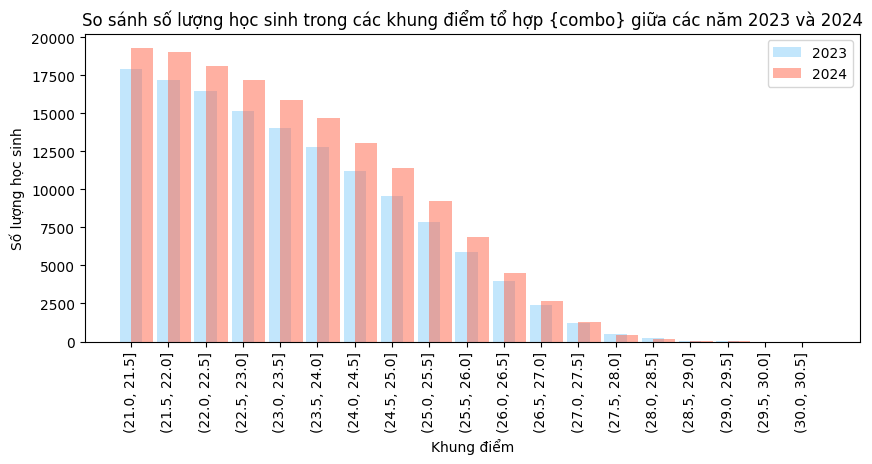

In [19]:
#uoc luong
from scipy import stats
#lua chon to hop mon can phan tich
combo = 'A1'
#chia khung diem tu 20 den 30, moi khoang 1 diem
bins = np.arange(21, 31, 0.5)
#loc du lieu cho nam 2023 va 2024
data_2023 = data_all[data_all['year'] == 2023]
data_2024 = data_all[data_all['year'] == 2024]
#tao bang dem so luong hoc sinh trong moi khung diem cho tung nam
data_2023['bins'] = pd.cut(data_2023[combo], bins)
data_2024['bins'] = pd.cut(data_2024[combo], bins)
count_2023 = data_2023['bins'].value_counts().sort_index()
count_2024 = data_2024['bins'].value_counts().sort_index()
#tinh toan su chenh lech trung binh so hoc sinh va khoang tin cay
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))
#hien thi ket qua
print("Sự chênh lệch trung bình số học sinh:", mean_diff)
print("Khoảng tin cậy 95% cho sự chênh lệch trung bình:", confidence_interval)
#ve bieu do so sanh so luong hoc sinh trong moi khung diem cho 2 nam
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align = 'center', alpha = 0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align = 'edge', alpha = 0.5, color='tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng học sinh')
plt.title('So sánh số lượng học sinh trong các khung điểm tổ hợp {combo} giữa các năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()



Khối B

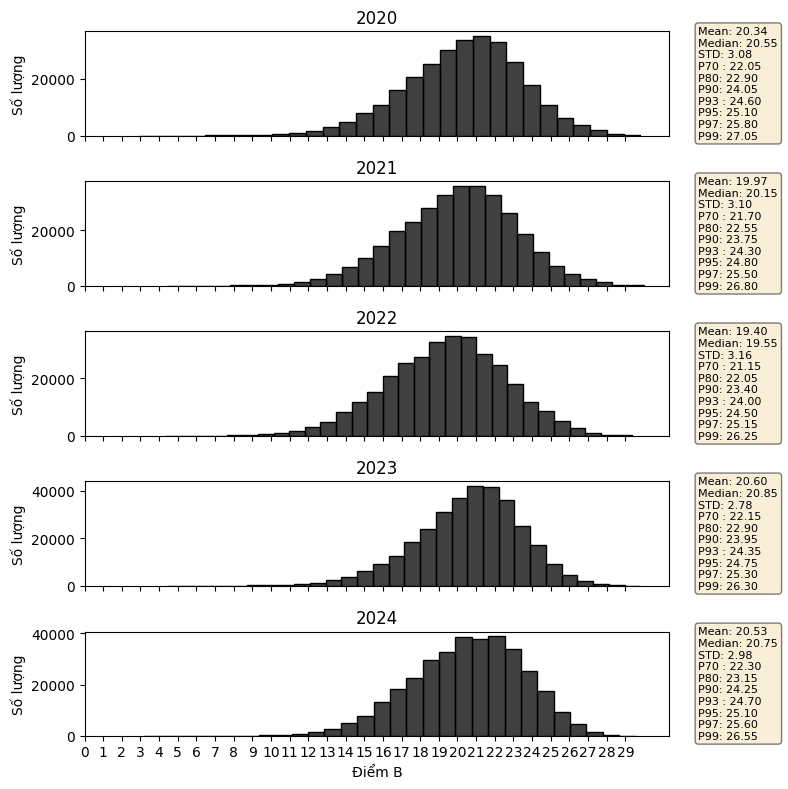

In [20]:
data = data_all
sub = 'B'
#chuyen doi cot year sang dang so
data['year'] = pd.to_numeric(data['year'])
#loc du lieu cho 5 nam gan day
recent_years = data[data['year'].isin([2020,2021,2022,2023,2024])]
socre = list(range(0, 30, 1))
#tao histogram cho diem toan trong 5 nam gan day sap xep theo dang 1 cot 5 hang
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)
#cac nam gan day sap xep theo thu tu tang dan
recent_years_sorted = sorted(recent_years['year'].unique())
#ve histogram cho tung nam va hien thi cac thong tin thong ke
for i, year in enumerate(recent_years_sorted):
  sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black',color='black')
  axes[i].set_title(f'{year}')
  axes[i].set_xlabel(f'Điểm {sub}')
  axes[i].set_ylabel('Số lượng')
  #tinh toan cac thong ke
  year_data = recent_years[recent_years['year']==year][sub].dropna()
  mean = year_data.mean()
  median = year_data.median()
  std_dev = year_data.std()
  p70 = year_data.quantile(0.70)
  p80 = year_data.quantile(0.80)
  p90 = year_data.quantile(0.90)
  p93 = year_data.quantile(0.93)
  p95 = year_data.quantile(0.95)
  p97 = year_data.quantile(0.97)
  p99 = year_data.quantile(0.99)
  #hien thi thong tin thong ke tren bieu do
  textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70 : {p70:.2f}\nP80: {p80:.2f}\nP90: {p90:.2f}\n'
                f'P93 : {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8,
                  verticalalignment='center', horizontalalignment='left', bbox=props)
plt.xticks(socre)
plt.tight_layout()
plt.show()


<ipython-input-21-074cb1caf282>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['bins'] = pd.cut(data_2023[combo], bins)
<ipython-input-21-074cb1caf282>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['bins'] = pd.cut(data_2024[combo], bins)


Sự chênh lệch trung bình số học sinh: 228.26315789473756
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-5558.543545538889, 6015.069861328364)


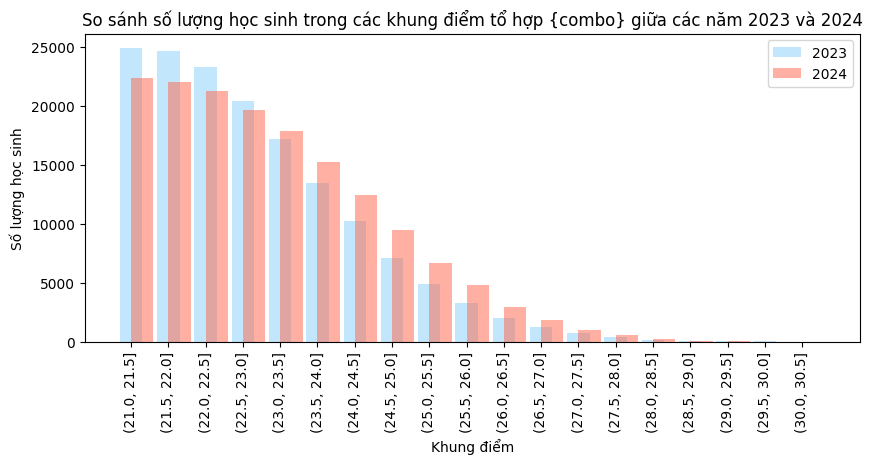

In [21]:
#uoc luong
from scipy import stats
#lua chon to hop mon can phan tich
combo = 'B'
#chia khung diem tu 20 den 30, moi khoang 1 diem
bins = np.arange(21, 31, 0.5)
#loc du lieu cho nam 2023 va 2024
data_2023 = data_all[data_all['year'] == 2023]
data_2024 = data_all[data_all['year'] == 2024]
#tao bang dem so luong hoc sinh trong moi khung diem cho tung nam
data_2023['bins'] = pd.cut(data_2023[combo], bins)
data_2024['bins'] = pd.cut(data_2024[combo], bins)
count_2023 = data_2023['bins'].value_counts().sort_index()
count_2024 = data_2024['bins'].value_counts().sort_index()
#tinh toan su chenh lech trung binh so hoc sinh va khoang tin cay
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))
#hien thi ket qua
print("Sự chênh lệch trung bình số học sinh:", mean_diff)
print("Khoảng tin cậy 95% cho sự chênh lệch trung bình:", confidence_interval)
#ve bieu do so sanh so luong hoc sinh trong moi khung diem cho 2 nam
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align = 'center', alpha = 0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align = 'edge', alpha = 0.5, color='tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng học sinh')
plt.title('So sánh số lượng học sinh trong các khung điểm tổ hợp {combo} giữa các năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()



Khối C

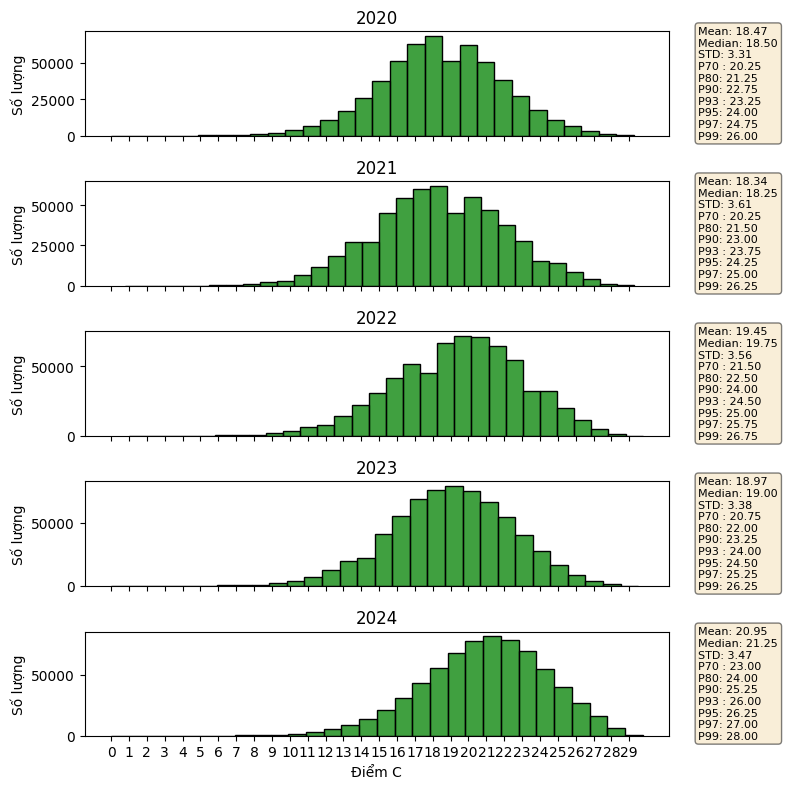

In [22]:
data = data_all
sub = 'C'
#chuyen doi cot year sang dang so
data['year'] = pd.to_numeric(data['year'])
#loc du lieu cho 5 nam gan day
recent_years = data[data['year'].isin([2020,2021,2022,2023,2024])]
socre = list(range(0, 30, 1))
#tao histogram cho diem toan trong 5 nam gan day sap xep theo dang 1 cot 5 hang
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)
#cac nam gan day sap xep theo thu tu tang dan
recent_years_sorted = sorted(recent_years['year'].unique())
#ve histogram cho tung nam va hien thi cac thong tin thong ke
for i, year in enumerate(recent_years_sorted):
  sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black',color='green')
  axes[i].set_title(f'{year}')
  axes[i].set_xlabel(f'Điểm {sub}')
  axes[i].set_ylabel('Số lượng')
  #tinh toan cac thong ke
  year_data = recent_years[recent_years['year']==year][sub].dropna()
  mean = year_data.mean()
  median = year_data.median()
  std_dev = year_data.std()
  p70 = year_data.quantile(0.70)
  p80 = year_data.quantile(0.80)
  p90 = year_data.quantile(0.90)
  p93 = year_data.quantile(0.93)
  p95 = year_data.quantile(0.95)
  p97 = year_data.quantile(0.97)
  p99 = year_data.quantile(0.99)
  #hien thi thong tin thong ke tren bieu do
  textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70 : {p70:.2f}\nP80: {p80:.2f}\nP90: {p90:.2f}\n'
                f'P93 : {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8,
                  verticalalignment='center', horizontalalignment='left', bbox=props)
plt.xticks(socre)
plt.tight_layout()
plt.show()


<ipython-input-23-0696a2d1af13>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['bins'] = pd.cut(data_2023[combo], bins)
<ipython-input-23-0696a2d1af13>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['bins'] = pd.cut(data_2024[combo], bins)


Sự chênh lệch trung bình số học sinh: 8919.842105263158
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (523.9640932788097, 17315.720117247507)


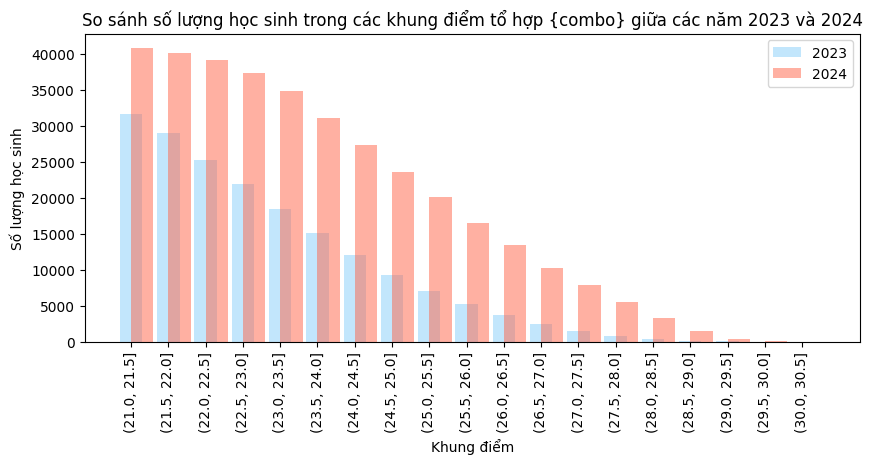

In [23]:
#uoc luong
from scipy import stats
#lua chon to hop mon can phan tich
combo = 'C'
#chia khung diem tu 20 den 30, moi khoang 1 diem
bins = np.arange(21, 31, 0.5)
#loc du lieu cho nam 2023 va 2024
data_2023 = data_all[data_all['year'] == 2023]
data_2024 = data_all[data_all['year'] == 2024]
#tao bang dem so luong hoc sinh trong moi khung diem cho tung nam
data_2023['bins'] = pd.cut(data_2023[combo], bins)
data_2024['bins'] = pd.cut(data_2024[combo], bins)
count_2023 = data_2023['bins'].value_counts().sort_index()
count_2024 = data_2024['bins'].value_counts().sort_index()
#tinh toan su chenh lech trung binh so hoc sinh va khoang tin cay
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))
#hien thi ket qua
print("Sự chênh lệch trung bình số học sinh:", mean_diff)
print("Khoảng tin cậy 95% cho sự chênh lệch trung bình:", confidence_interval)
#ve bieu do so sanh so luong hoc sinh trong moi khung diem cho 2 nam
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align = 'center', alpha = 0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align = 'edge', alpha = 0.5, color='tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng học sinh')
plt.title('So sánh số lượng học sinh trong các khung điểm tổ hợp {combo} giữa các năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()



Khối D

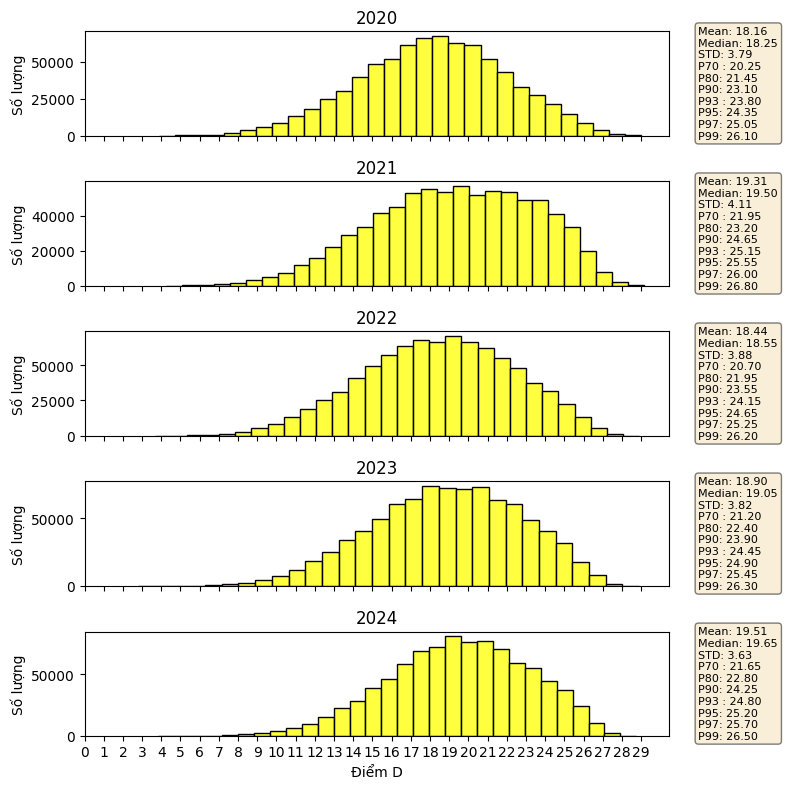

In [24]:
data = data_all
sub = 'D'
#chuyen doi cot year sang dang so
data['year'] = pd.to_numeric(data['year'])
#loc du lieu cho 5 nam gan day
recent_years = data[data['year'].isin([2020,2021,2022,2023,2024])]
socre = list(range(0, 30, 1))
#tao histogram cho diem toan trong 5 nam gan day sap xep theo dang 1 cot 5 hang
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)
#cac nam gan day sap xep theo thu tu tang dan
recent_years_sorted = sorted(recent_years['year'].unique())
#ve histogram cho tung nam va hien thi cac thong tin thong ke
for i, year in enumerate(recent_years_sorted):
  sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black',color='yellow')
  axes[i].set_title(f'{year}')
  axes[i].set_xlabel(f'Điểm {sub}')
  axes[i].set_ylabel('Số lượng')
  #tinh toan cac thong ke
  year_data = recent_years[recent_years['year']==year][sub].dropna()
  mean = year_data.mean()
  median = year_data.median()
  std_dev = year_data.std()
  p70 = year_data.quantile(0.70)
  p80 = year_data.quantile(0.80)
  p90 = year_data.quantile(0.90)
  p93 = year_data.quantile(0.93)
  p95 = year_data.quantile(0.95)
  p97 = year_data.quantile(0.97)
  p99 = year_data.quantile(0.99)
  #hien thi thong tin thong ke tren bieu do
  textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70 : {p70:.2f}\nP80: {p80:.2f}\nP90: {p90:.2f}\n'
                f'P93 : {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8,
                  verticalalignment='center', horizontalalignment='left', bbox=props)
plt.xticks(socre)
plt.tight_layout()
plt.show()


<ipython-input-25-b02b7293c1e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['bins'] = pd.cut(data_2023[combo], bins)
<ipython-input-25-b02b7293c1e2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['bins'] = pd.cut(data_2024[combo], bins)


Sự chênh lệch trung bình số học sinh: 2597.78947368421
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-7134.5510005606775, 12330.129947929097)


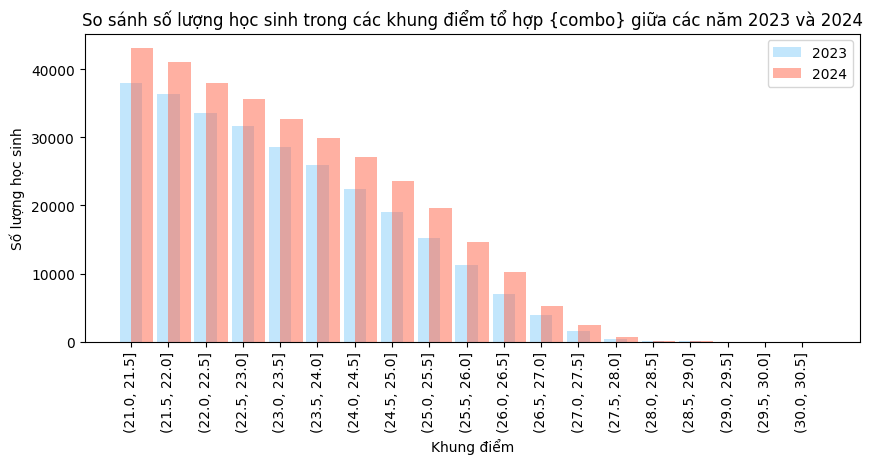

In [25]:
#uoc luong
from scipy import stats
#lua chon to hop mon can phan tich
combo = 'D'
#chia khung diem tu 20 den 30, moi khoang 1 diem
bins = np.arange(21, 31, 0.5)
#loc du lieu cho nam 2023 va 2024
data_2023 = data_all[data_all['year'] == 2023]
data_2024 = data_all[data_all['year'] == 2024]
#tao bang dem so luong hoc sinh trong moi khung diem cho tung nam
data_2023['bins'] = pd.cut(data_2023[combo], bins)
data_2024['bins'] = pd.cut(data_2024[combo], bins)
count_2023 = data_2023['bins'].value_counts().sort_index()
count_2024 = data_2024['bins'].value_counts().sort_index()
#tinh toan su chenh lech trung binh so hoc sinh va khoang tin cay
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))
#hien thi ket qua
print("Sự chênh lệch trung bình số học sinh:", mean_diff)
print("Khoảng tin cậy 95% cho sự chênh lệch trung bình:", confidence_interval)
#ve bieu do so sanh so luong hoc sinh trong moi khung diem cho 2 nam
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align = 'center', alpha = 0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align = 'edge', alpha = 0.5, color='tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng học sinh')
plt.title('So sánh số lượng học sinh trong các khung điểm tổ hợp {combo} giữa các năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()



Khối D07

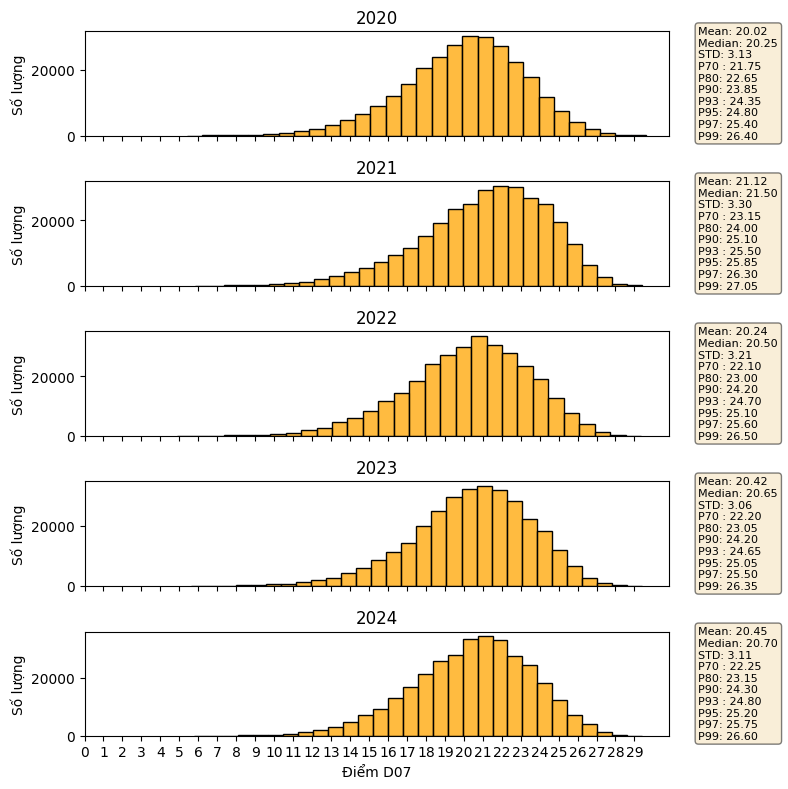

In [26]:
data = data_all
sub = 'D07'
#chuyen doi cot year sang dang so
data['year'] = pd.to_numeric(data['year'])
#loc du lieu cho 5 nam gan day
recent_years = data[data['year'].isin([2020,2021,2022,2023,2024])]
socre = list(range(0, 30, 1))
#tao histogram cho diem toan trong 5 nam gan day sap xep theo dang 1 cot 5 hang
fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True)
#cac nam gan day sap xep theo thu tu tang dan
recent_years_sorted = sorted(recent_years['year'].unique())
#ve histogram cho tung nam va hien thi cac thong tin thong ke
for i, year in enumerate(recent_years_sorted):
  sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black',color='orange')
  axes[i].set_title(f'{year}')
  axes[i].set_xlabel(f'Điểm {sub}')
  axes[i].set_ylabel('Số lượng')
  #tinh toan cac thong ke
  year_data = recent_years[recent_years['year']==year][sub].dropna()
  mean = year_data.mean()
  median = year_data.median()
  std_dev = year_data.std()
  p70 = year_data.quantile(0.70)
  p80 = year_data.quantile(0.80)
  p90 = year_data.quantile(0.90)
  p93 = year_data.quantile(0.93)
  p95 = year_data.quantile(0.95)
  p97 = year_data.quantile(0.97)
  p99 = year_data.quantile(0.99)
  #hien thi thong tin thong ke tren bieu do
  textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
                f'P70 : {p70:.2f}\nP80: {p80:.2f}\nP90: {p90:.2f}\n'
                f'P93 : {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}\nP99: {p99:.2f}')
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8,
                  verticalalignment='center', horizontalalignment='left', bbox=props)
plt.xticks(socre)
plt.tight_layout()
plt.show()


<ipython-input-27-67dd253598bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['bins'] = pd.cut(data_2023[combo], bins)
<ipython-input-27-67dd253598bb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['bins'] = pd.cut(data_2024[combo], bins)


Sự chênh lệch trung bình số học sinh: 424.84210526315746
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-4679.699769100388, 5529.383979626703)


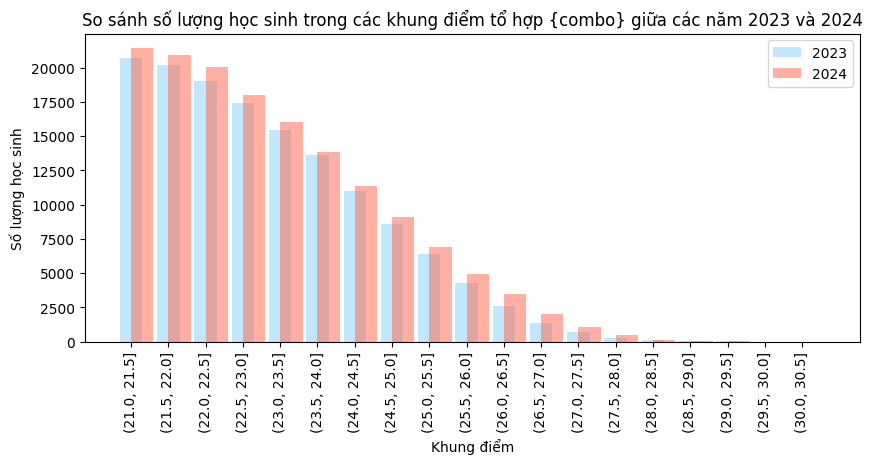

In [27]:
#uoc luong
from scipy import stats
#lua chon to hop mon can phan tich
combo = 'D07'
#chia khung diem tu 20 den 30, moi khoang 1 diem
bins = np.arange(21, 31, 0.5)
#loc du lieu cho nam 2023 va 2024
data_2023 = data_all[data_all['year'] == 2023]
data_2024 = data_all[data_all['year'] == 2024]
#tao bang dem so luong hoc sinh trong moi khung diem cho tung nam
data_2023['bins'] = pd.cut(data_2023[combo], bins)
data_2024['bins'] = pd.cut(data_2024[combo], bins)
count_2023 = data_2023['bins'].value_counts().sort_index()
count_2024 = data_2024['bins'].value_counts().sort_index()
#tinh toan su chenh lech trung binh so hoc sinh va khoang tin cay
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))
#hien thi ket qua
print("Sự chênh lệch trung bình số học sinh:", mean_diff)
print("Khoảng tin cậy 95% cho sự chênh lệch trung bình:", confidence_interval)
#ve bieu do so sanh so luong hoc sinh trong moi khung diem cho 2 nam
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align = 'center', alpha = 0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align = 'edge', alpha = 0.5, color='tomato')
plt.xlabel('Khung điểm')
plt.ylabel('Số lượng học sinh')
plt.title('So sánh số lượng học sinh trong các khung điểm tổ hợp {combo} giữa các năm 2023 và 2024')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

